In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.labelsize'] = 14  # fontsize of the x any y labels
plt.rcParams['xtick.labelsize'] = 12 # fontsize of the x tick labels
plt.rcParams['ytick.labelsize'] = 12 # fontsize of the y tick labels

# Sklearn imports
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score,precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
#Scipy imports
from scipy import stats

#import itertools
import itertools

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")


# 1. Read data from this URL


In [ ]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# 2. Defining and mapping features to data

#### Define the column names based on the data description

In [ ]:
column_names = ['ID','Diagnosis']

# Add mean real-valued features
mean_features = ['Mean_Radius', 'Mean_Texture', 'Mean_Perimeter', 'Mean_Area',
                 'Mean_Smoothness', 'Mean_Compactness', 'Mean_Concavity',
                 'Mean_Concave_Points', 'Mean_Symmetry', 'Mean_Fractal_Dimension']

# Add standard error feature names
se_features = ['SE_Radius', 'SE_Texture', 'SE_Perimeter', 'SE_Area',
               'SE_Smoothness', 'SE_Compactness', 'SE_Concavity',
               'SE_Concave_Points', 'SE_Symmetry', 'SE_Fractal_Dimension']

# Add worst feature names
worst_features = ['Worst_Radius', 'Worst_Texture', 'Worst_Perimeter', 'Worst_Area',
                  'Worst_Smoothness', 'Worst_Compactness', 'Worst_Concavity',
                  'Worst_Concave_Points', 'Worst_Symmetry', 'Worst_Fractal_Dimension']


# combine all columns
all_columns = column_names + mean_features + se_features + worst_features

# assign column names to dataframe
data.columns = all_columns

In [ ]:
data.head()

,ID,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,...,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 3. Encoding target variable

In [ ]:
data['Diagnosis']  = data['Diagnosis'].map({'M':1,'B':0})


In [ ]:
data.tail()

,ID,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,...,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [ ]:
class_names = {0: 'Benign', 1: 'Malignant'}

# 4. Model building

In [ ]:
# Extract X and y
X = data.drop(columns=['Diagnosis','ID'],axis=1)
y = data.Diagnosis
X.head()

,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,...,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:

inner_cv = KFold(n_splits=5, shuffle=True,random_state=42)
outer_cv = KFold(n_splits=5, shuffle=True,random_state=42)
np.random.seed(42)
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

 ## 4.1 Decision Tree

In [ ]:
gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth': range(1,20),'criterion':['gini','entropy']}],
                  scoring='f1',
                  cv=inner_cv)
gs_dt = gs_dt.fit(X_train,y_train)
print("Inner CV F1: ", gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_)
print("Optimal Estimator: ", gs_dt.best_estimator_)

Inner CV F1:  0.9214790585758328
Optimal Parameter:  {'criterion': 'gini', 'max_depth': 7}
Optimal Estimator:  DecisionTreeClassifier(max_depth=7, random_state=42)


In [ ]:
best_dt=DecisionTreeClassifier(random_state=42,criterion= 'gini', max_depth= 7)

nested_score_gs_dt = cross_val_score(best_dt, X=X, y=y, cv=outer_cv,scoring='f1')
print("Nested CV F1: ",nested_score_gs_dt.mean(), " +/- ", nested_score_gs_dt.std())

Nested CV F1:  0.9103676851259814  +/-  0.02211607718435726


In [ ]:
from sklearn.metrics import confusion_matrix
best_dt = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=7)
best_dt.fit(X_train, y_train)
y_pred = best_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[70  2]
 [ 5 37]]


##4.2 Logistic Regression


In [ ]:
gs_lr = GridSearchCV(estimator=LogisticRegression(random_state=42, solver='liblinear'),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],'penalty':['l1','l2']}],
                  scoring='f1',
                  cv=inner_cv)
gs_lr = gs_lr.fit(X_train,y_train)

print("Inner CV F1: ", gs_lr.best_score_)
print("Optimal Parameter: ", gs_lr.best_params_)
print("Optimal Estimator: ", gs_lr.best_estimator_)

Inner CV F1:  0.9506778093986104
Optimal Parameter:  {'C': 1000, 'penalty': 'l1'}
Optimal Estimator:  LogisticRegression(C=1000, penalty='l1', random_state=42, solver='liblinear')


In [ ]:
best_lr=LogisticRegression(random_state=42,C=1000, penalty='l1',solver='liblinear')
nested_score_gs_lr = cross_val_score(best_lr, X=X, y=y, cv=outer_cv,scoring='f1')
print("Nested CV F1:",nested_score_gs_lr.mean(), " +/- ", nested_score_gs_lr.std())

Nested CV F1: 0.9543454715219422  +/-  0.03002585198790486


In [ ]:
from sklearn.metrics import confusion_matrix
best_lr.fit(X_train, y_train)
y_pred = best_lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[70  2]
 [ 4 38]]


##4.3 KNN

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import random
import numpy as np
np.random.seed(42)

pipe = Pipeline([
    ('sc', StandardScaler()),
    ('knn', KNeighborsClassifier(p=2, metric='minkowski')) ])
params = {  'knn__n_neighbors': range(1,20),
        'knn__weights': ['uniform', 'distance'] }
gs_knn = GridSearchCV(estimator=pipe,param_grid=params,scoring='f1',cv=inner_cv,)

gs_knn = gs_knn.fit(X_train,y_train)
print("Inner CV F1: ", gs_knn.best_score_)
print("Optimal Parameter: ", gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_)

Inner CV F1:  0.9567639694417907
Optimal Parameter:  {'knn__n_neighbors': 3, 'knn__weights': 'uniform'}
Optimal Estimator:  Pipeline(steps=[('sc', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])


In [ ]:
best_knn =Pipeline([('sc', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3,weights='uniform',p=2, metric='minkowski')) ])
nested_score_gs_knn= cross_val_score(best_knn, X=X, y=y, cv=outer_cv,scoring='f1')
print("Nested CV F1: ",nested_score_gs_knn.mean(), " +/- ", nested_score_gs_knn.std())

Nested CV F1:  0.9470833861351012  +/-  0.01778525540609691


In [ ]:
from sklearn.metrics import confusion_matrix
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[71  1]
 [ 6 36]]


# 5. Learning Curve for Logistic Regression

In [ ]:

%matplotlib inline
# Import necessary libraries and specify that graphs should be plotted inline.
from sklearn.datasets import load_iris # import Iris Data Set
from sklearn import linear_model       # the sklearn.linear_model module implements generalized linear models
import numpy as np                     # NumPy is the package for scientific computing with Python
from sklearn.model_selection import learning_curve # determines cross-validated training and test scores for different training set sizes


In [ ]:
def plot_learning_curve(estimator,        # data science algorithm
                        title,            # title of the plot
                        X, y,             # data (features and target variable)
                        ylim=None,        # minimum and maximum y values plotted
                        cv=None,          # cross validation splits
                        n_jobs=1,         # parallell estimation using multiple processors
                        train_sizes=np.linspace(.1, 1.0, 10)): #linspace returns evenly spaced numbers over a specified interval (start, stop, num)

    # Initialization of Figure
    plt.figure()                    # display figure

    # Titles/labels for the plot are set
    plt.title(title)                # specify title based on parameter provided as input
    if ylim is not None:            # if ylim was specified as an input, make sure the plots use these limits
        plt.ylim(*ylim)
    plt.xlabel("Training examples") # y label title
    plt.ylabel("Score")             # x label title

    # Learning Curve Calculation
    # This helps to understand how the model's performance varies as more data is used for training.
    # Class learning_curve determines cross-validated training and test scores for different training set sizes
    # Detailed documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html
    # train_sizes = numbers of training examples that has been used to generate the learning curve
    # train_scores = scores on training sets (array)
    # test_scores = scores on test set (array)
    train_sizes, train_scores, test_scores = learning_curve(estimator, # data science algorithm
                                                            X, y,      # data (features and target variable)
                                                            cv=cv,     # cross-validation folds
                                                            n_jobs=n_jobs, # number of jobs to run in parallel using multiple processors
                                                            train_sizes=train_sizes) # relative or absolute numbers of training examples
                                                                                     # that will be used to generate the learning curve

    # Score Calculations
    # Cross validation statistics for training and testing data (mean and standard deviation)
    train_scores_mean = np.mean(train_scores, axis=1) # compute the arithmetic mean along the specified axis.
    train_scores_std = np.std(train_scores, axis=1)   # compute the standard deviation along the specified axis.
    test_scores_mean = np.mean(test_scores, axis=1)   # compute the arithmetic mean along the specified axis.
    test_scores_std = np.std(test_scores, axis=1)     # compute the standard deviation along the specified axis.

    # Visualization of Learning Curve
    plt.grid()                                        # configure the grid lines in the plot
                                                      # adds grid lines to the plot for better visualization and understanding of the data points

    # Fill Between Scores to Indicate Standard Deviation
    # Fill the area around the line to indicate the size of standard deviations for the training data
    # and the test data
    # The area filled represents one standard deviation above and below the mean of the training/test scores
    plt.fill_between(train_sizes,                            # the x coordinates of the nodes defining the curves
                     train_scores_mean - train_scores_std,   # the y coordinates of the nodes defining the first curve
                     train_scores_mean + train_scores_std,   # the y coordinates of the nodes defining the second curve
                     alpha=0.1,                              # level of transparency in the color fill
                     color="r")                              # train data performance indicated with red
    plt.fill_between(train_sizes,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1,
                     color="g")                              # test data performance indicated with green

    # Plotting the Mean Scores
    # Cross-validation mean scores indicated by dots
    # Train data performance indicated with red
    plt.plot(train_sizes,                                    # the horizontal coordinates of the data points
             train_scores_mean,                              # the vertical coordinates of the data points
             'o-',                                           # o- will produce a small circle and a solid line to connect the markers
             color="r",                                      # line of red color
             label="Training score")                         # specify label title for this plot

    # Test data performance indicated with green
    plt.plot(train_sizes,
             test_scores_mean,
             'o-',
             color="g",                                      # line of green color
             label="Cross-validation score")

    plt.legend(loc="best")                      # show legend of the plot at the best location possible
                                                # placing it in the "best" location based on where matplotlib thinks it will least overlap with other elements
    return plt                                  # function that returns the plot as an output

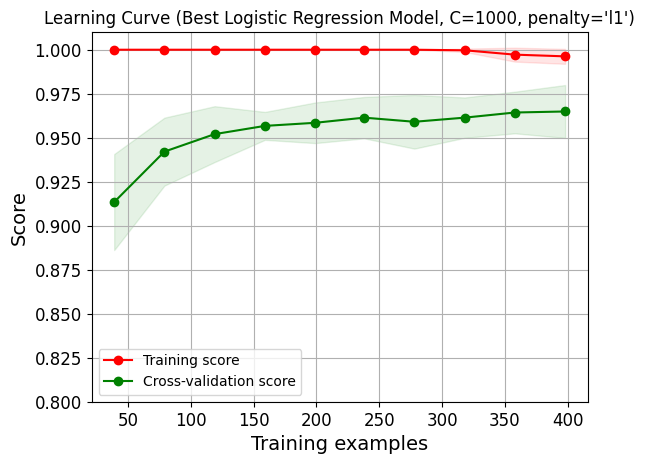

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt

# Previously, the title was set for Logistic Regression.
# If you know the best parameters, you might want to include them in the title for clarity.
title = "Learning Curve (Best Logistic Regression Model, C=1000, penalty='l1')"

# The cross-validator remains the same; no change here.
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

# Previously, an instance of a default Logistic Regression model was created.
# Now, we create an instance of the best Logistic Regression model that you tuned earlier.
# We use the best parameters found by GridSearchCV for C and penalty and specify the solver.
best_lr = LogisticRegression(random_state=42, C=1000, penalty='l1', solver='liblinear')

# Now, call the plot_learning_curve function with the best_lr estimator.
# The ylim, cv, and n_jobs parameters remain the same.
plot_learning_curve(best_lr, title, X, y, (0.8, 1.01), cv=cv, n_jobs=4)

# Finally, display the figure. This remains unchanged.
plt.show()


# 6. Fitting Graph for Decision Tree

In [ ]:
from sklearn.model_selection import validation_curve
np.random.seed(42)
param_range =range(1,16)
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

train_scores, test_scores = validation_curve(
                estimator=DecisionTreeClassifier(random_state=42),
                X=X_train,
                y=y_train,
                param_name="max_depth",
                param_range=param_range,
                cv=10,
                scoring="accuracy",                           )

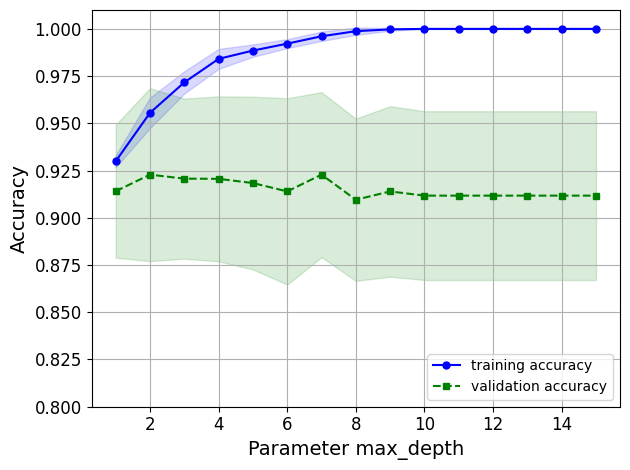

In [ ]:
train_mean = np.mean(train_scores, axis=1) # compute the arithmetic mean along the specified axis (train data)
train_std = np.std(train_scores, axis=1)   # compute the standard deviation along the specified axis (train data)
test_mean = np.mean(test_scores, axis=1)   # compute the arithmetic mean along the specified axis (test data)
test_std = np.std(test_scores, axis=1)     # compute the standard deviation along the specified axis (test data)

############################## Visualization - Fitting Graph ##############################

# Plot train accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range,                     # the horizontal coordinates of the data points
         train_mean,                      # the vertical coordinates of the data points
         color='blue',                    # aesthetic parameter - color
         marker='o',                      # aesthetic parameter - marker
         markersize=5,                    # aesthetic parameter - size of marker
         label='training accuracy')       # specify label title

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range,             # the x coordinates of the nodes defining the curves
                 train_mean + train_std,  # the y coordinates of the nodes defining the first curve
                 train_mean - train_std,  # the y coordinates of the nodes defining the second curve
                 alpha=0.15,              # level of transparency in the color fill
                 color='blue')            # aesthetic parameter - color

# Plot test accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range,
         test_mean,
         color='green',
         linestyle='--',
         marker='s',
         markersize=5,
         label='validation accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()

plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.01]) # y limits in the plot
plt.tight_layout()

plt.show()

# 7. Plot the ROC graph

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
# LR Classifier
clf1 = LogisticRegression(random_state=42,C=1000, penalty='l1',solver='liblinear')

# Decision Tree Classifier
clf2 = DecisionTreeClassifier(random_state=42,criterion= 'gini', max_depth= 7)

# kNN Classifier

clf3 = Pipeline([
    ('sc', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3,weights='uniform',p=2, metric='minkowski')) ])

# Label the classifiers
clf_labels = ['Logistic regression', 'Decision tree', 'kNN']
all_clf = [clf1, clf2, clf3]

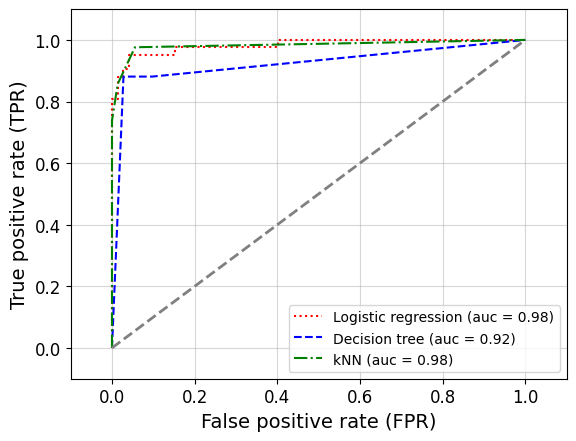

In [ ]:
colors = [ 'red', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):


    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_true=y_test,y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')    # where to place the legend
plt.plot([0, 1], [0, 1],         # visualize random classifier
         linestyle='--',         # aesthetic parameters
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


plt.show()